# Natural Language Processing with Disaster Tweets

Predict which Tweets are about real disasters and which ones are not.

**Link to Kaggle competition:**
Addison Howard, devrishi, Phil Culliton, Yufeng Guo. (2019). Natural Language Processing with Disaster Tweets. Kaggle. https://kaggle.com/competitions/nlp-getting-started

### Contents of Notebook:
- Defining **Customer Tokenizer with Lemmatization**
- nltk's Tweet Tokenizer
- Classification Method 1: **Multinomial Naive Bayes**
- Classification Method 2: **Linear Discriminant Analysis (LDA)**
- **TruncatedSVD** along with LDA
- Optimal hyperparameter search through **GridSearchCV** for LDA

### 1. Import necessary libraries & dataset.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction import text
from sklearn.pipeline import Pipeline
from sklearn import naive_bayes as nb
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from nltk import tokenize as tok
import nltk
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from nltk.corpus import wordnet
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

In [7]:
data = pd.read_csv("train.csv")

In [8]:
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [9]:
len(data)

7613

In [19]:
# data["keyword"].dropna().unique()

### 2. Text Preprocessing 

In [70]:
corpus = data["text"]
corpus[:5]

0    Our Deeds are the Reason of this #earthquake M...
1               Forest fire near La Ronge Sask. Canada
2    All residents asked to 'shelter in place' are ...
3    13,000 people receive #wildfires evacuation or...
4    Just got sent this photo from Ruby #Alaska as ...
Name: text, dtype: object

In [71]:
corpus = corpus.to_list()
corpus[:5]

['Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all',
 'Forest fire near La Ronge Sask. Canada',
 "All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected",
 '13,000 people receive #wildfires evacuation orders in California ',
 'Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school ']

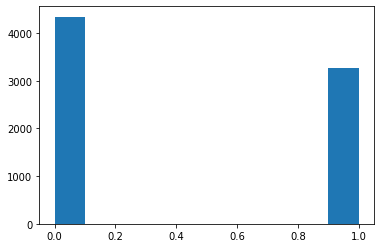

In [98]:
import matplotlib.pyplot as plt
plt.hist(data["target"]);

In [82]:
count_vec = text.CountVectorizer(strip_accents="unicode",
                                 lowercase= True,
                                 ngram_range=(1,1),
                                 analyzer="word",
                                 min_df = 0.001,
                                 stop_words="english"
                                 )

count_mat = count_vec.fit_transform(corpus).toarray()
count_df = pd.DataFrame(count_mat)
count_df.columns = count_vec.get_feature_names_out()
count_df

,00,01,04,05,06,07,08,10,100,11,...,years,yes,yesterday,yo,york,young,youth,youtube,yyc,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7608,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7609,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7610,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7611,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
# Check out the vocab
count_vec.vocabulary_

{'reason': 1168,
 'earthquake': 479,
 'allah': 91,
 'forest': 591,
 'near': 994,
 'la': 821,
 'canada': 263,
 'asked': 134,
 'place': 1092,
 'evacuation': 508,
 'orders': 1043,
 'expected': 515,
 '13': 12,
 'people': 1073,
 'wildfires': 1597,
 'california': 255,
 'just': 803,
 'got': 642,
 'sent': 1281,
 'photo': 1081,
 'alaska': 88,
 'smoke': 1332,
 'school': 1254,
 'update': 1526,
 'hwy': 748,
 '20': 22,
 'closed': 316,
 'lake': 826,
 'county': 358,
 'flood': 578,
 'disaster': 440,
 'heavy': 698,
 'rain': 1154,
 'causes': 284,
 'flash': 574,
 'flooding': 579,
 'streets': 1381,
 'colorado': 327,
 'areas': 121,
 'emergency': 492,
 'happening': 676,
 'building': 239,
 'street': 1380,
 'tornado': 1463,
 'coming': 332,
 'area': 120,
 'died': 435,
 'heat': 696,
 'wave': 1575,
 'far': 541,
 'haha': 665,
 'south': 1345,
 'getting': 625,
 'wait': 1556,
 'second': 1266,
 'live': 873,
 'gonna': 639,
 'florida': 581,
 '18': 19,
 'days': 398,
 've': 1541,
 'lost': 890,
 'myanmar': 986,
 'arrived'

In [132]:
# Take a look at tfidf vectors

tfidf = text.TfidfTransformer(norm='l2')

tfidf_mat = tfidf.fit_transform(count_df).toarray()
tfidf_mat

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.39463663, 0.41881732, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

### 3. Model Building & Selection

#### 3.1. Getting a baseline score with NaiveBayes

In [119]:
# Train test split

X = data["text"]
y = data["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [391]:
# Build classification pipeline

pipe = Pipeline(steps=[("count_vec" , text.CountVectorizer(strip_accents="unicode",
                                                             lowercase= True,
                                                             ngram_range=(1,2),
                                                             analyzer="word",
                                                             min_df = 0.001,
                                                           #  stop_words="english",
                                                            tokenizer=myTokenizer,
                                                            token_pattern=None
                                                             )),
                       ("tfidf"     ,  text.TfidfTransformer(norm='l2')),
                       ("classifier",  nb.MultinomialNB())])


In [323]:
# Fit the model on the whole train dataset

pipe.fit(X_train,y_train)
y_pred_train = pipe.predict(X_train)
y_pred = pipe.predict(X_test)

print("Train f1 score:", metrics.f1_score(y_train, y_pred_train))
print("Test f1 score:", metrics.f1_score(y_test, y_pred))

Train f1 score: 0.7729618163054696
Test f1 score: 0.7288317256162915


### 4. Adding a customer tokenizer & lemmatization
-  **1. Lemmatizing Tokenizer (Custom-defined)**
-  **2. nltk's TweetTokenizer**

In [281]:
def get_wordnet_pos(term):
    tag = nltk.pos_tag([term])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

def myTokenizer(doc):
    lemmatizer = nltk.stem.WordNetLemmatizer()
    lemm_tokens=[]
    tokens = [term for term in tok.word_tokenize(doc) if len(term)>2]
    lemm_tokens += [lemmatizer.lemmatize(token, get_wordnet_pos(token)) for token in tokens]
    return lemm_tokens

from nltk.tokenize import TweetTokenizer

twt_tokenizer = TweetTokenizer()

twt_tokenizer.tokenize(corpus[0])

['Our',
 'Deeds',
 'are',
 'the',
 'Reason',
 'of',
 'this',
 '#earthquake',
 'May',
 'ALLAH',
 'Forgive',
 'us',
 'all']

In [198]:
# Sample

print("Original text:\n\n", data["text"][150],"\n\n")
print("Tokenized & lemmatized text:\n\n",myTokenizer(data["text"][150]))

Original text:

 @mickinyman @TheAtlantic That or they might be killed in an airplane accident in the night a car wreck! Politics at it's best. 


Tokenized & lemmatized text:

 ['mickinyman', 'TheAtlantic', 'That', 'they', 'might', 'kill', 'airplane', 'accident', 'the', 'night', 'car', 'wreck', 'Politics', 'best']


In [327]:
# Build classification pipeline

pipe = Pipeline(steps=[("count_vec" , text.CountVectorizer(strip_accents="unicode",
                                                             lowercase= True,
                                                             ngram_range=(1,1),
                                                             analyzer="word",
                                                             min_df = 0.001,
                                                          #  stop_words="english",
                                                             tokenizer = myTokenizer,
                                                             token_pattern=None
                                                             )),
                       ("tfidf"     ,  text.TfidfTransformer(norm='l2')),
                       ("classifier",  nb.MultinomialNB())])


print("Train k-fold f1 score:",cross_val_score(pipe, X_train, y_train, scoring = "f1", cv = 5).mean())
pipe.fit(X_train, y_train)

y_pred_train = pipe.predict(X_train)
y_pred = pipe.predict(X_test)

print("Train f1 score:", metrics.f1_score(y_train, y_pred_train))
print("Test f1 score:", metrics.f1_score(y_test, y_pred))

len(pipe.named_steps["tfidf"].get_feature_names_out())

Train k-fold f1 score: 0.7204780145116031
Train f1 score: 0.7765180146132526
Test f1 score: 0.735632183908046


1545

### 4. Linear Discriminant Analysis

In [328]:
# Build classification pipeline

from sklearn.preprocessing import FunctionTransformer
from sklearn.decomposition import TruncatedSVD

def transform_to_array(X):
    return X.toarray()

pipe = Pipeline(steps=[("count_vec" , text.CountVectorizer(strip_accents="unicode",
                                                             lowercase= True,
                                                             ngram_range=(1,2),
                                                             analyzer="word",
                                                             min_df = 0.001,
                                                         #   stop_words="english",
                                                             tokenizer = myTokenizer,
                                                             token_pattern=None
                                                             )),
                       ("tfidf"     ,  text.TfidfTransformer(norm='l2')),
                    #  ("toarray"  ,  FunctionTransformer(transform_to_array)),
                       ("dim_red"  ,  TruncatedSVD(n_components=100)),
                       ("classifier",  LinearDiscriminantAnalysis(n_components=1))])


print("Train k-fold f1 score:",cross_val_score(pipe, X_train, y_train, scoring = "f1", cv = 5).mean())
pipe.fit(X_train, y_train)

y_pred_train = pipe.predict(X_train)
y_pred = pipe.predict(X_test)

print("Train f1 score:", metrics.f1_score(y_train, y_pred_train))
print("Test f1 score:", metrics.f1_score(y_test, y_pred))

print(len(pipe.named_steps["tfidf"].get_feature_names_out()))

Train k-fold f1 score: 0.6860623563900089
Train f1 score: 0.7055016181229773
Test f1 score: 0.672182006204757
2364


### 5.  LDA with Grid Search

In [367]:
from sklearn.model_selection import GridSearchCV
from datetime import datetime as dt

In [384]:
start = dt.now()

pipe = Pipeline(steps=[("count_vec" , text.CountVectorizer(strip_accents="unicode",
                                                             lowercase= True,
                                                             ngram_range=(1,2),
                                                             analyzer="word",
                                                             min_df = 0.001,
                                                         #   stop_words="english",
                                                             tokenizer = myTokenizer,
                                                             token_pattern=None
                                                             )),
                       ("tfidf"     ,  text.TfidfTransformer(norm='l2')),
                       ("dim_red"  ,  TruncatedSVD(n_components=500)),
                       ("classifier",  LinearDiscriminantAnalysis(n_components=1))])


param_grid = {"dim_red__n_components":[400, 500, 600],
              "count_vec__ngram_range": [(1,1), (1,2), (2,2)],
              "count_vec__tokenizer": [myTokenizer, twt_tokenizer.tokenize]}

grid = GridSearchCV(pipe,
                    param_grid=param_grid,
                    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), 
                    scoring="f1",
                    verbose=1)

grid.fit(X_train,y_train)
print("\n\nGrid best estimator: ",grid.best_estimator_)
print("\n\nGrid best params: ",grid.best_params_)
print("\n\nGrid best score: ",grid.best_score_)
y_pred = grid.predict(X_test)
print("\n\nTest f1 score:", metrics.f1_score(y_test, y_pred))
y_pred_train = grid.predict(X_train)
print("\n\nTrain f1 score:", metrics.f1_score(y_train, y_pred_train))

print("\n\nTime: ", (dt.now() - start))

Fitting 5 folds for each of 18 candidates, totalling 90 fits


Grid best estimator:  Pipeline(steps=[('count_vec',
                 CountVectorizer(min_df=0.001, ngram_range=(1, 2),
                                 strip_accents='unicode', token_pattern=None,
                                 tokenizer=<function myTokenizer at 0x2c9b3c940>)),
                ('tfidf', TfidfTransformer()),
                ('dim_red', TruncatedSVD(n_components=400)),
                ('classifier', LinearDiscriminantAnalysis(n_components=1))])


Grid best params:  {'count_vec__ngram_range': (1, 2), 'count_vec__tokenizer': <function myTokenizer at 0x2c9b3c940>, 'dim_red__n_components': 400}


Grid best score:  0.740596572923463


Test f1 score: 0.7427993936331481


Train f1 score: 0.7800289435600579


Time:  0:07:23.691764


### 5. Get preds and submission file

In [385]:
pipe = Pipeline(steps=[("count_vec" , text.CountVectorizer(strip_accents="unicode",
                                                             lowercase= True,
                                                             ngram_range=(1,2),
                                                             analyzer="word",
                                                             min_df = 0.001,
                                                         #   stop_words="english",
                                                             tokenizer = myTokenizer,
                                                             token_pattern=None
                                                             )),
                       ("tfidf"     ,  text.TfidfTransformer(norm='l2')),
                       ("dim_red"  ,  TruncatedSVD(n_components=500)),
                       ("classifier",  LinearDiscriminantAnalysis(n_components=1))])

In [387]:
test_data = data = pd.read_csv("test.csv")
X_ = test_data["text"]

In [392]:
pipe.fit(X, y)
y_submission_simple_LDA = pipe.predict(X_)
y_submission_simple_LDA

array([1, 0, 1, ..., 1, 1, 1])

In [393]:
submission_df = pd.DataFrame({#index: test_data["id"],
                              "target": y_submission_simple_LDA},
                            index = test_data["id"])


submission_df.head()

,target
id,
0,1
2,0
3,1
9,1
11,1


In [394]:
submission_df.to_csv("Submission_LDA_truSVD500_myTok.csv")